Bike sharing demand prediction

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,HTML
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))


['day.csv', 'Readme.txt', 'hour.csv']


Exploratery data analysis

In [2]:
hour_df=pd.read_csv('../input/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
hour_df.shape

(17379, 17)

In [4]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Rename the attributes for better understanding

In [5]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month',
                        'cnt':'total_count','hr':'hour','yr':'year'},inplace=True)
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Describe the dataset

In [6]:
hour_df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Type casting the datetime and categorical attributes

In [7]:
hour_df['datetime']=pd.to_datetime(hour_df.datetime)

hour_df['season']=hour_df.season.astype('category')
hour_df['year']=hour_df.year.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['hour']=hour_df.hour.astype('category')
hour_df['is_holiday']=hour_df.is_holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['is_workingday']=hour_df.is_workingday.astype('category')
hour_df['weather_condition']=hour_df.weather_condition.astype('category')


Attributes distribution and trends

Season wise hourly distribution of counts

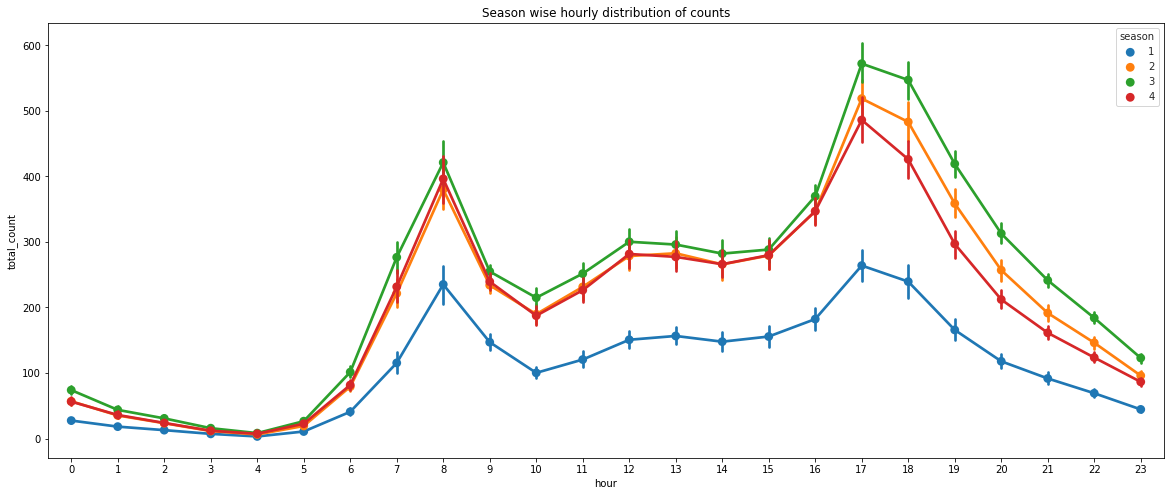

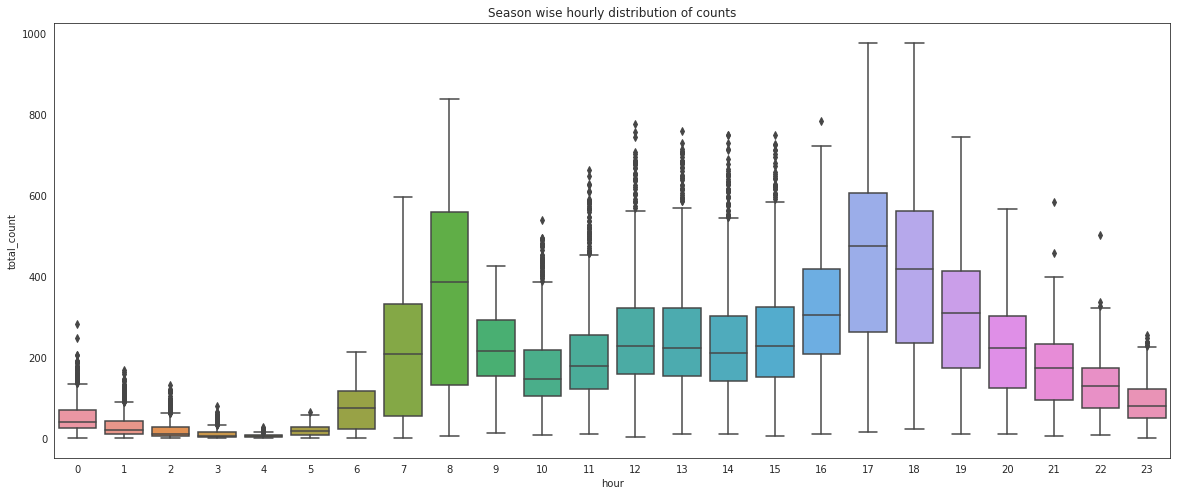

In [8]:
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style('white')

sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','season']],hue='season',ax=ax)
ax.set_title('Season wise hourly distribution of counts')
plt.show()
fig,ax1=plt.subplots(figsize=(20,8))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count']],ax=ax1)
ax1.set_title('Season wise hourly distribution of counts')
plt.show()

Weekday wise hourly distribution of counts

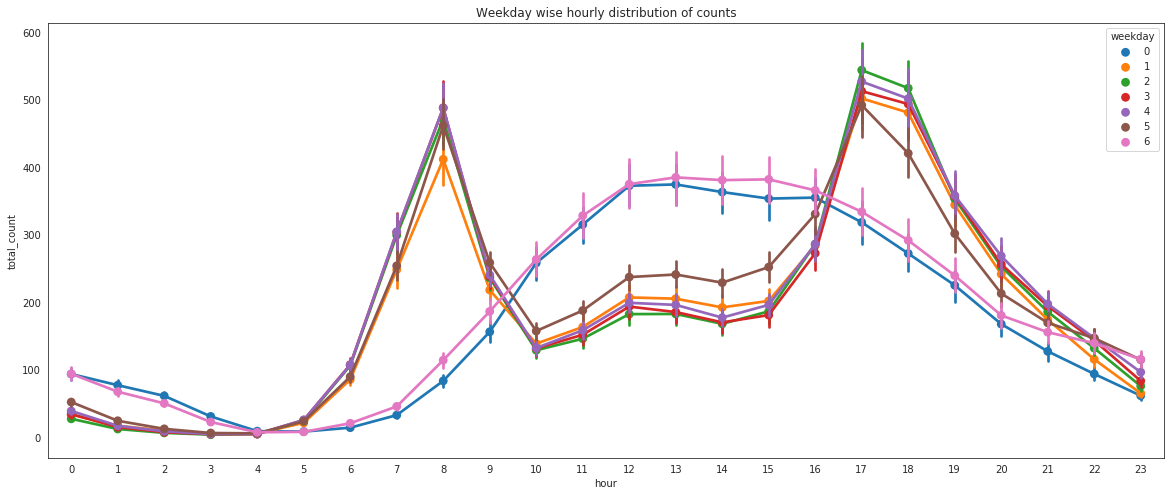

In [9]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','weekday']],hue='weekday')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

Monthly distribution of counts

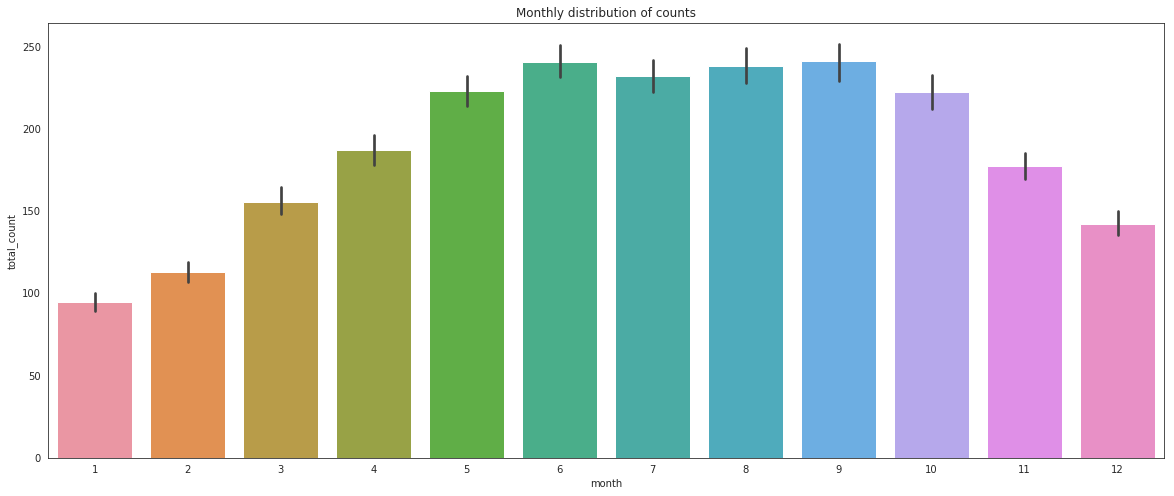

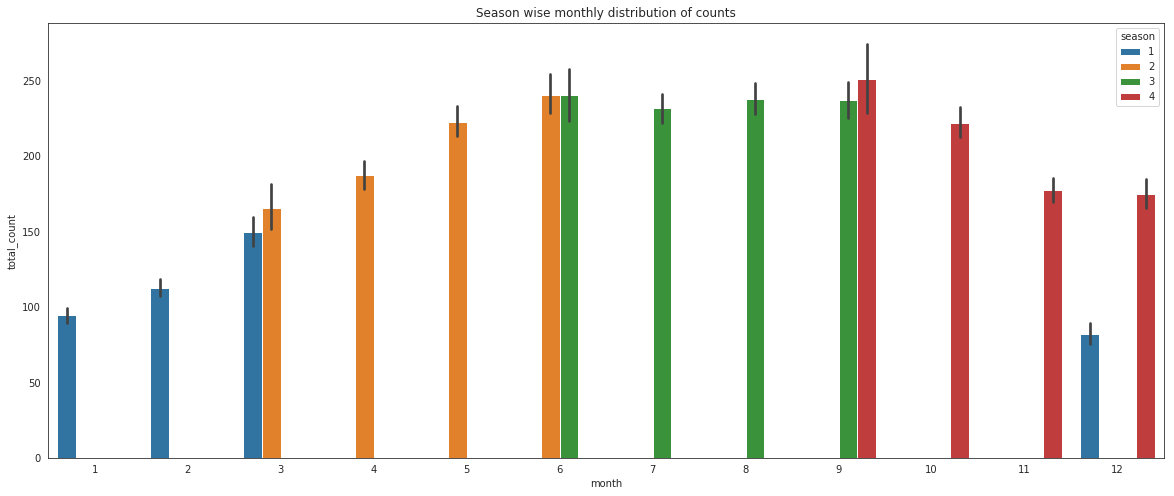

In [10]:
fig,ax1=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count']],ax=ax1)
ax1.set_title('Monthly distribution of counts')
plt.show()
fig,ax2=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count','season']],hue='season',ax=ax2)
ax2.set_title('Season wise monthly distribution of counts')
plt.show()

Yearly wise distribution of counts

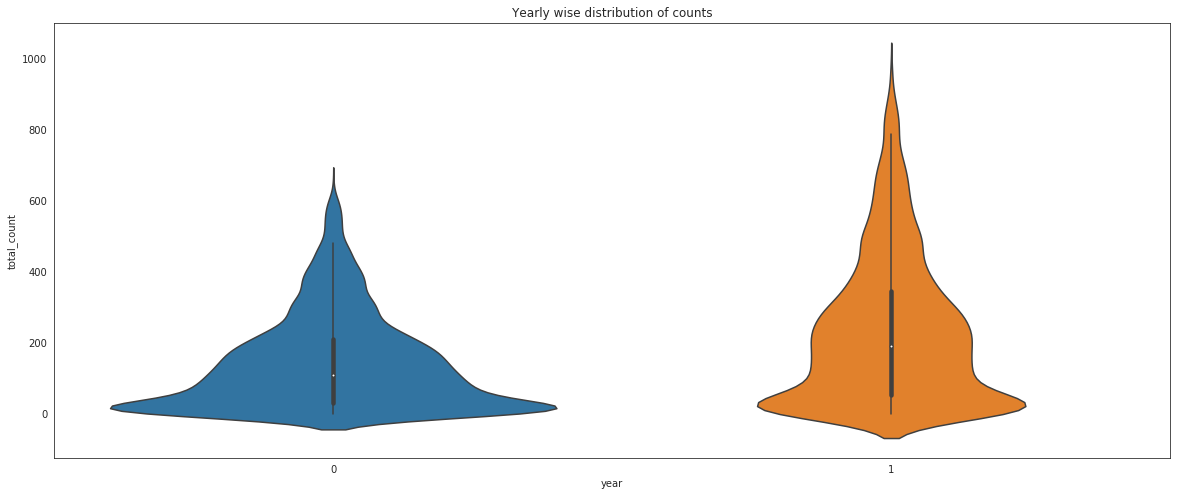

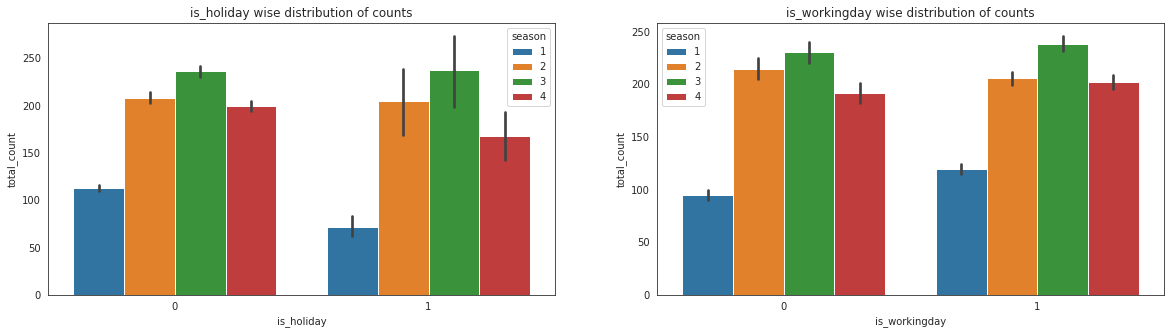

In [11]:
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count']])
ax.set_title('Yearly wise distribution of counts')
plt.show()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
ax1.set_title('is_holiday wise distribution of counts')
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)
ax2.set_title('is_workingday wise distribution of counts')
plt.show()

Outliers distribution

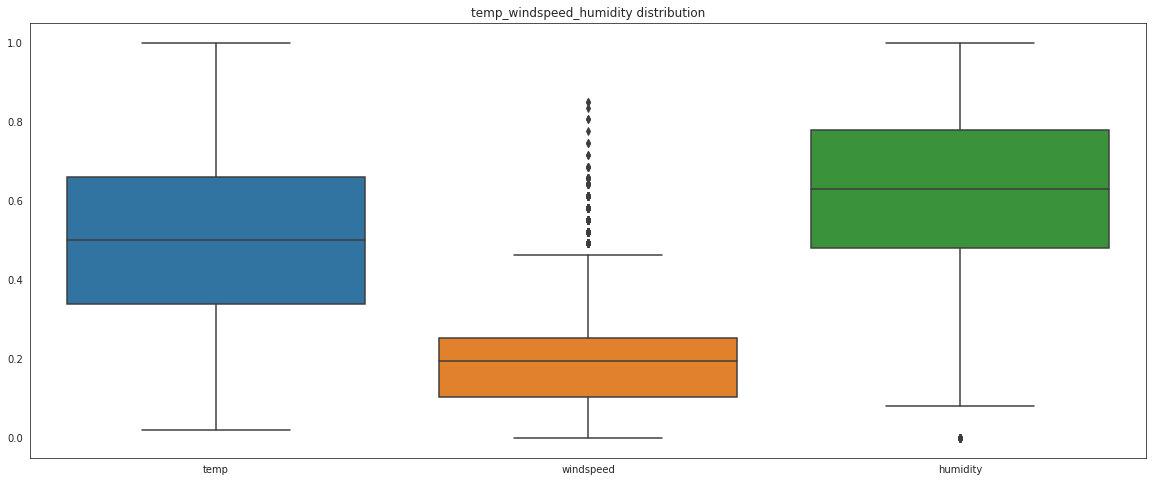

In [12]:
fig,ax=plt.subplots(figsize=(20,8))

sns.boxplot(data=hour_df[['temp','windspeed','humidity']])
ax.set_title('temp_windspeed_humidity distribution')
plt.show()

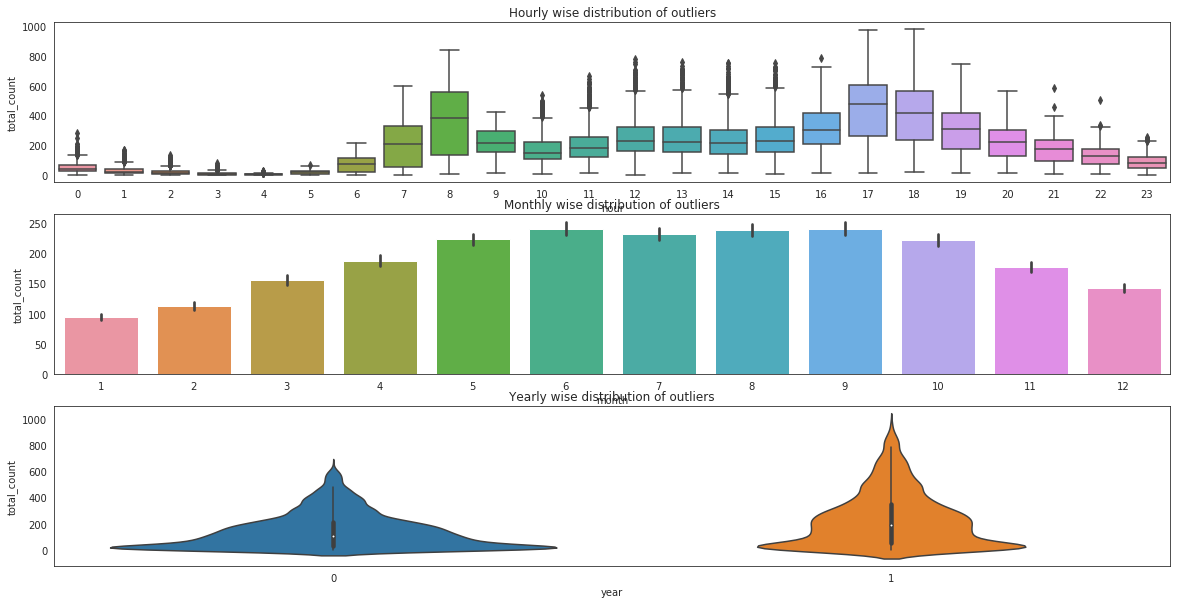

In [13]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,figsize=(20,10))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count']],ax=ax1)
ax1.set_title('Hourly wise distribution of outliers')

sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count']],ax=ax2)
ax2.set_title('Monthly wise distribution of outliers')

sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count']],ax=ax3)
ax3.set_title('Yearly wise distribution of outliers')
plt.show()

Correlation matrix for better understanding between different attributes of the data.

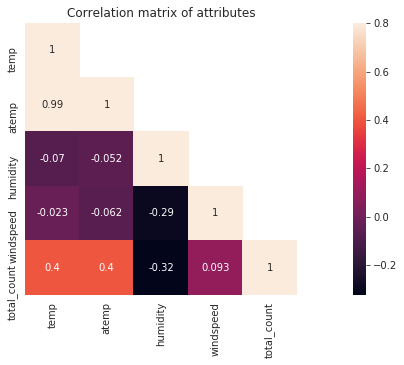

In [14]:
correMtr=hour_df[["temp","atemp","humidity","windspeed","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Regression analysis

In [15]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

Split the training dataset

In [16]:
X_train,X_test,y_train,y_test= train_test_split(hour_df.iloc[:,0:-3],hour_df['total_count'],test_size=0.3,random_state=42)

X_train=X_train.reset_index() 
y_train=y_train.reset_index()

X_test=X_test.reset_index() 
y_test=y_test.reset_index() 

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(12165, 15) (5214, 15) (12165, 2) (5214, 2)
   index  total_count
0  11229            9
1   6334          209
2  11060           30
3  12346          644
4  15437          217
   index  total_count
0  12830          425
1   8688           88
2   7091            4
3  12230          526
4    431           13


Normality test(probability plot)

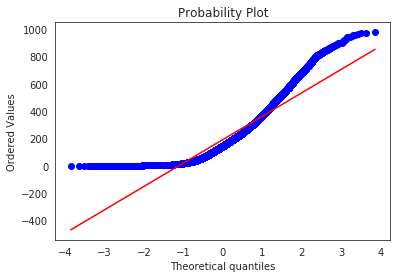

In [17]:
import scipy
from scipy import stats
stats.probplot(y_train.total_count.tolist(),dist='norm',plot=plt)
plt.show()

Split the features into categorical and numerical features

In [18]:
training_features=X_train[['season','is_holiday','is_workingday','weather_condition','hour','month','year','weekday','temp','atemp','humidity','windspeed']]
categorical_features=['season','is_holiday','is_workingday','weather_condition']
numerical_features=[['temp','atemp','humidity','windspeed','hour','month','year','weekday']]

Decoding the training features

In [19]:
training_attributes=pd.get_dummies(training_features,columns=categorical_features)
training_attributes.head()

,hour,month,year,weekday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,2,4,1,3,0.50,0.4848,0.42,0.1940,0,1,0,0,1,0,0,1,0,1,0,0
1,12,9,0,1,0.68,0.6364,0.79,0.1642,0,0,0,1,1,0,0,1,0,1,0,0
2,0,4,1,3,0.34,0.3030,0.36,0.4179,0,1,0,0,1,0,0,1,1,0,0,0
3,15,6,1,0,0.70,0.6364,0.34,0.0000,0,1,0,0,1,0,1,0,1,0,0,0
4,10,10,1,3,0.56,0.5303,0.52,0.2985,0,0,0,1,1,0,0,1,1,0,0,0


Linear regression

In [20]:
X_train=training_attributes
y_train=y_train.total_count.values
lr=linear_model.LinearRegression()

fit the training model

In [21]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Cross validation prediction

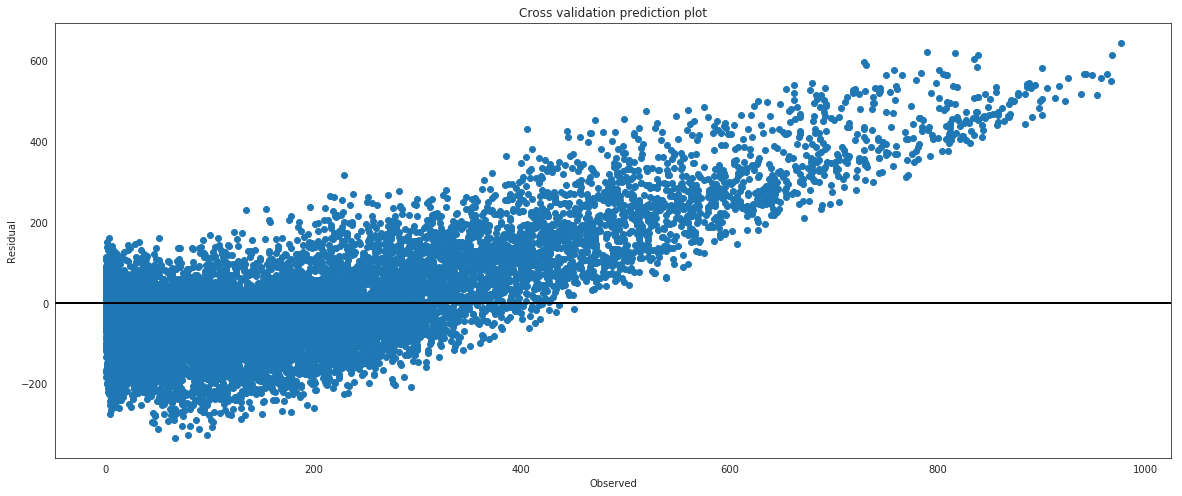

In [22]:
predict=cross_val_predict(lr,X_train,y_train,cv=3)

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

From the cross validation prediction plot, we observed that it violates the homoscedasticity assumption
and it is nothing but if all the random variables sequence or vector have the same finite variance.

Model evalution metrics

R-squared and mean squared error scores

In [23]:
r2_scores = cross_val_score(lr, X_train, y_train, cv=3)
mse_scores = cross_val_score(lr, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(r2_scores)
print(mse_scores) 

[0.38820321 0.4012105  0.39892529]
[-20094.17728291 -19966.14937644 -20527.0050427 ]


Cross validation scores

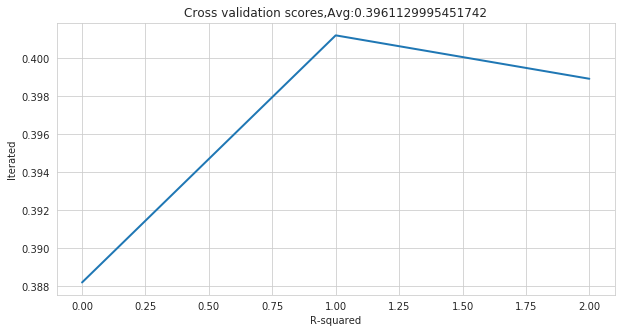

In [24]:
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2 )
ax.set_xlabel('R-squared')#coefficeint of determination
ax.set_ylabel('Iterated')
ax.set_title('Cross validation scores,Avg:{}'.format(np.average(r2_scores)))
plt.show()

From the R-squared or coefficient of determination is 0.39 on average for 3-fold cross validation and it means
that predictor is only able to explain 39% of the variance in the target variable.


Test data performance

Split the test dataset to categorical and numerical features

In [25]:
test_features= X_test[['season','is_holiday','weather_condition','is_workingday','hour','weekday','month','year','temp','atemp','humidity','windspeed']]
numeric_features = ['temp','humidity','windspeed','hour','weekday','month','year']
test_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

Decoding the test attributes

In [26]:
test_attributes=pd.get_dummies(test_features,columns=test_cat_features)
test_attributes.head()

,hour,weekday,month,year,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,19,6,6,1,0.80,0.6970,0.27,0.1940,0,0,1,0,1,0,1,0,0,0,1,0
1,20,1,1,1,0.24,0.2273,0.41,0.2239,1,0,0,0,0,1,1,0,0,0,1,0
2,2,5,10,0,0.32,0.3030,0.66,0.2836,0,0,0,1,1,0,1,0,0,0,0,1
3,19,2,5,1,0.78,0.7121,0.52,0.3582,0,1,0,0,1,0,1,0,0,0,0,1
4,0,4,1,0,0.26,0.2273,0.56,0.3881,1,0,0,0,1,0,1,0,0,0,0,1


fit the model

In [27]:
X_test=test_attributes
y_test=y_test.total_count.values
lr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

predict the model

In [28]:
y_pred=lr.predict(X_test)

Model evaluation metrics

**Root mean squared error and mean absolute error**

In [29]:

rmse=sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmse)
mae=metrics.mean_absolute_error(y_test,y_pred)
print(mae)

137.519066493797
102.57366134296859


Residual plot

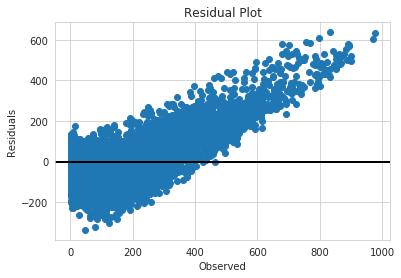

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test-y_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

From the linear regression anaysis, we can conclude that model not suitable for this problem due 
non linearirty of data.

Decision tree regressor

In [31]:
X_train=training_attributes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=40)

fit the model

In [32]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=40, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Decision tree regression accuracy score

In [33]:
dtr.score(X_train,y_train)

0.8181266371151767

Plot the learned model

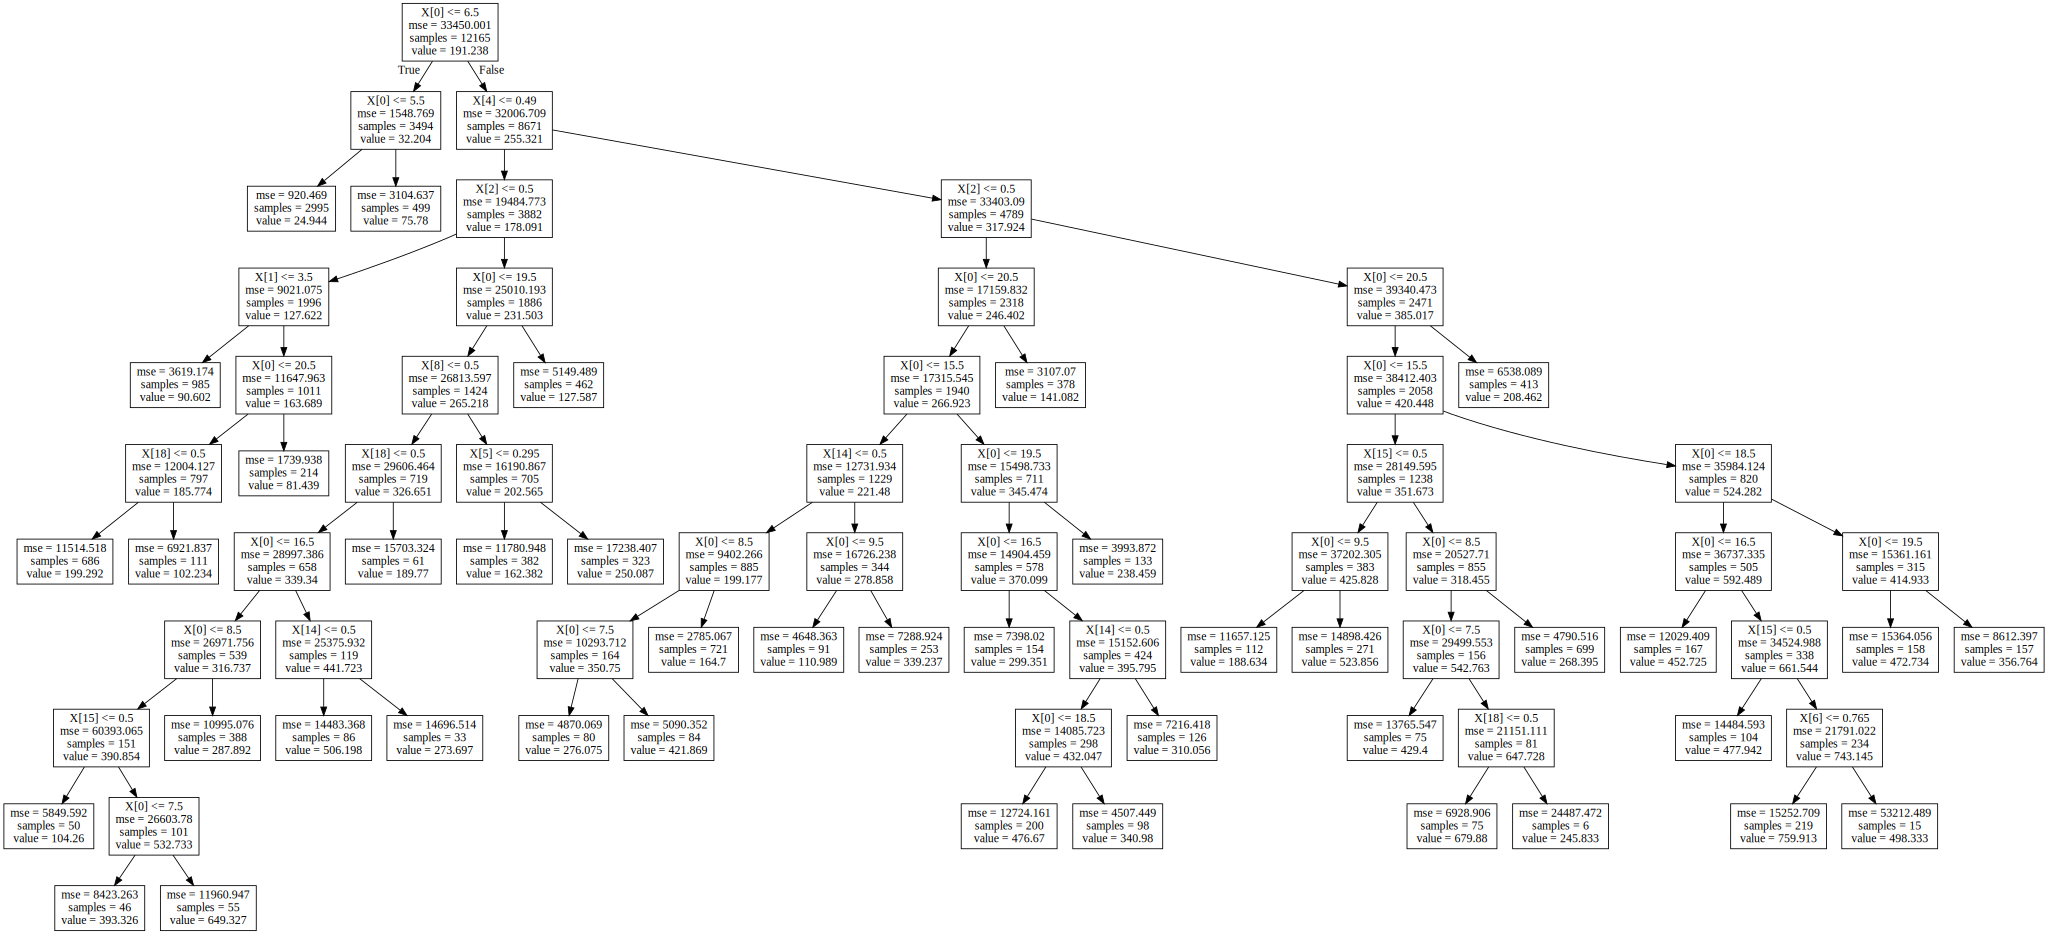

In [34]:
from sklearn import tree
import pydot
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Randomized search cv with cross validation

In [35]:
from scipy.stats import randint as sp_randint
param_random = {"criterion": ["mse", "mae"],
              "min_samples_split": sp_randint(1, 5, 10),
              "max_depth": [2, 6, 8],
              "min_samples_leaf": sp_randint(5, 10,20),
              "max_leaf_nodes": sp_randint( 10, 20, 40),
              }

Trained the Random Search CV model

In [36]:
X_train=training_attributes

randomized_cv_dtr = RandomizedSearchCV(dtr, param_random, cv=3,random_state=32)

fit the model

In [37]:
randomized_cv_dtr.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=40, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'criterion': ['mse', 'mae'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fede0fd7a58>, 'max_depth': [2, 6, 8], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fede0fd7b00>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fede0fd7c88>},
          pre_dispatch='2*n_jobs', random_state=32, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

model best score and best parameters

In [38]:
print(randomized_cv_dtr.best_score_)
print(randomized_cv_dtr.best_params_)

0.8147836224405438
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 55, 'min_samples_leaf': 27, 'min_samples_split': 14}


Parameter hypertuning  results

In [39]:
df=pd.DataFrame(data=randomized_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.391067,0.012179,0.006672,0.000309,mae,6,56,29,13,"{'criterion': 'mae', 'max_depth': 6, 'max_leaf...",0.760079,0.765847,0.759293,0.761740,0.002922,9,0.768633,0.776464,0.767529,0.770875,0.003977
1,0.019478,0.000369,0.005444,0.000117,mse,2,57,26,14,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.497005,0.492423,0.488794,0.492740,0.003360,10,0.493735,0.497173,0.496793,0.495900,0.001539
2,2.379049,0.035798,0.006466,0.000101,mae,8,59,29,14,"{'criterion': 'mae', 'max_depth': 8, 'max_leaf...",0.796034,0.819810,0.802204,0.806016,0.010074,5,0.816243,0.827280,0.812234,0.818586,0.006362
3,2.389956,0.004507,0.006376,0.000050,mae,6,52,28,11,"{'criterion': 'mae', 'max_depth': 6, 'max_leaf...",0.759240,0.765970,0.773487,0.766232,0.005819,8,0.768111,0.775911,0.779162,0.774394,0.004637
4,0.027910,0.000217,0.005968,0.000239,mse,8,54,27,11,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf...",0.811650,0.802489,0.829531,0.814557,0.011229,2,0.843189,0.820379,0.839034,0.834201,0.009919


Effect of depth and leaf nodes on model performance

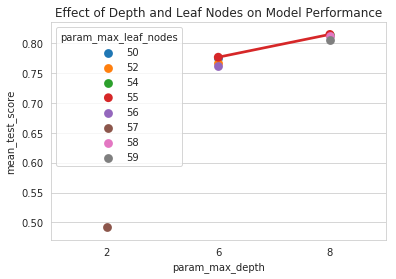

In [40]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")
plt.show()

Residual plot

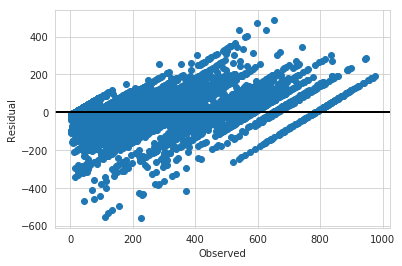

In [41]:
predicted = randomized_cv_dtr.best_estimator_.predict(X_train)
residuals = y_train.flatten()-predicted
fig, ax = plt.subplots()
ax.scatter(y_train.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

R-squared and mean squared error scores

In [42]:
r2_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=3)
print(r2_scores)
mse_scores = cross_val_score(randomized_cv_dtr.best_estimator_, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(mse_scores)

[0.81202981 0.80367125 0.82864981]
[-6173.79227832 -6546.42275184 -5851.69558336]


Setting the model for testing

In [43]:
best_dtr_model = randomized_cv_dtr.best_estimator_
pred = best_dtr_model.predict(X_test)

Root mean squared error and mean absolute error

In [44]:

rmse=sqrt(metrics.mean_squared_error(y_test,pred))
print(rmse)
mae=metrics.mean_absolute_error(y_test,pred)
print(mae)

155.0831749766031
105.96963239645946


Residual plot

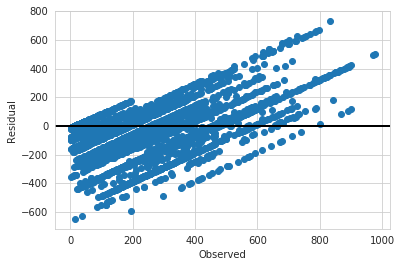

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), y_test.flatten()-pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()


**Random Forest**

In [46]:
from sklearn.ensemble import RandomForestRegressor
X_train=training_attributes
rf=RandomForestRegressor(n_estimators=200)

**Fit the model**

In [47]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

**Random forest accuracy score**

In [48]:
rf.score(X_train,y_train)

0.9923269428330932

**Cross validation prediction**

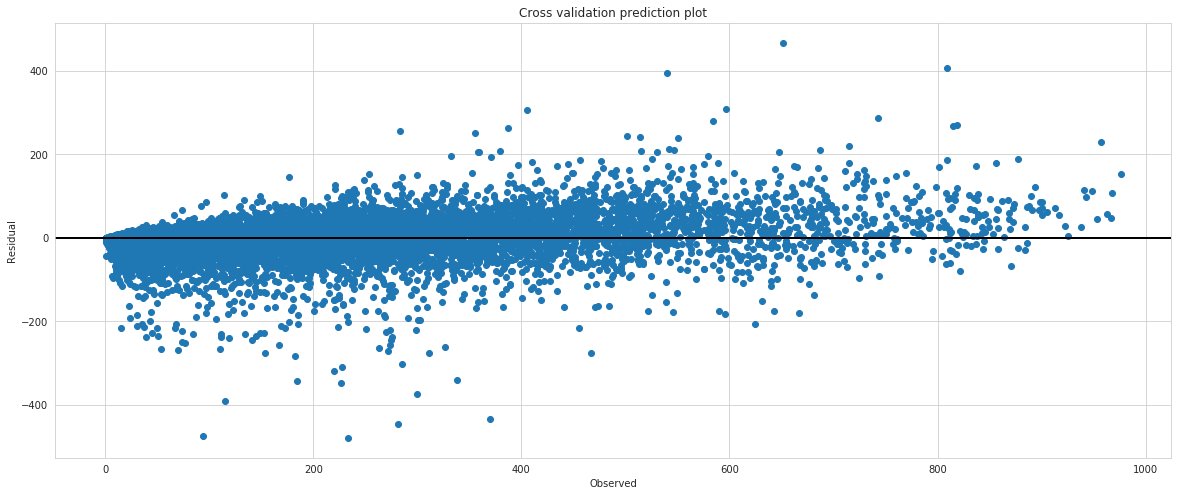

In [49]:
predict=cross_val_predict(rf,X_train,y_train,cv=3)

fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**R-squared and mean squared error scores**

In [50]:
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print(r2_scores)
mse_scores = cross_val_score(rf, X_train, y_train, cv=3,scoring='neg_mean_squared_error')
print(mse_scores)

[0.93475616 0.93993444 0.93429338]
[-2135.88540515 -2013.85722101 -2224.54644134]


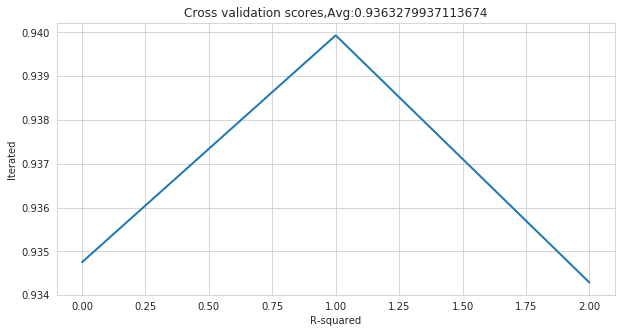

In [51]:
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(10,5))
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2 )
ax.set_xlabel('R-squared')#coefficeint of determination
ax.set_ylabel('Iterated')
ax.set_title('Cross validation scores,Avg:{}'.format(np.average(r2_scores)))
plt.show()

**Predict the model**

In [52]:
X_test=test_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([298.49 ,  96.705,  46.205, ..., 428.75 , 514.065,   4.52 ])

**Root mean squared error and mean absolute error**

In [53]:
rmse=sqrt(metrics.mean_squared_error(y_test,rf_pred))
print(rmse)
mae=metrics.mean_absolute_error(y_test,rf_pred)
print(mae)

138.6417705621924
93.65370385820228


**Residual plot**

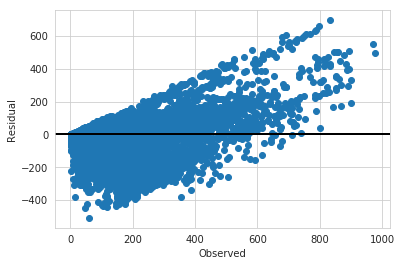

In [54]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test-rf_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

**Final model for predicting the bike rental count on daily basis**

When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error. So, finally random forest model is best for predicting the bike rental count on daily basis.

In [55]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Rental_Count.csv')
Bike_predictions

,y_test,rf_pred
0,425,298.490000
1,88,96.705000
2,4,46.205000
3,526,392.805000
4,13,49.450000
5,32,91.850000
6,706,503.230000
7,26,125.435000
8,2,58.370000
9,21,7.465000
